# Probabilidad

- Evento binario: $x \in \{0, 1\}$
- Experimento moneda: $x \in \{"cara", "sello", "borde"\}$
- $\sum_x P(X=x)=1$

In [ ]:
probabilidad_juan = 5 / 31
probabilidad_juan


0.16129032258064516

In [ ]:
1 - probabilidad_juan

0.8387096774193549

$P(X="juan") + P(X \neq "juan")$ = 1

- Probabilidad conjunta: $P(x, y) = P(x \cap y)$
- $P(x, y) = P(x) \dot ~ P(y | x) = P(y) \dot ~ P(x | y)$
- Si $X~\text{ind}~Y$ entonces $P(x, y) = P(x)P(y)$

$P(y=0|x=1)= 1 - P(y = 1|x=1)$

In [2]:
p_x_1 = 0.5
p_x_0 = 0.5
p_y_1_x_1 = 0.2
p_y_0_x_1 = 1 - p_y_1_x_1
p_y_1_x_0 = 0.001
p_y_0_x_0 = 1 - p_y_1_x_0

$P(x=1,y=1)=P(x=1)P(y=1|x=1)$

In [3]:
p_x_1 * p_y_1_x_1

0.1

$P(x=1,y=0) = P(x=1)P(y=0|x=1)$

In [4]:
p_x_1 * p_y_0_x_1

0.4

$P(x=0,y=1) = P(x=0)P(y=1|x=0)$

In [5]:
p_x_0 * p_y_1_x_0

0.0005

$P(x=0,y=0) = P(x=0)P(y=0|x=0)$

In [6]:
p_x_0 * p_y_0_x_0

0.4995

Validamos que sean probabilidades validas:

In [7]:
(
    p_x_1 * p_y_1_x_1
    + p_x_1 * p_y_0_x_1
    + p_x_0 * p_y_1_x_0
    + p_x_0 * p_y_0_x_0
)

1.0

# Modelos del Lenguaje

- **Corpus**: conjunto de datos de texto.
- **Documento**: muestra.
- **Token**: minima unidad de procesamiento (oracion, palabra, silaba, ngram, caracter).
- **Tokenizer**: funcion que extrae tokens de texto plano.
- **Vocabulario**: Conjunto de todos los posibles tokens en mi corpus.

In [ ]:
!apt install tree > /dev/null

In [ ]:
![[ -d corpus ]] && rm -rf corpus
!mkdir corpus
!mkdir corpus/{document1,document2}
!mkdir corpus/{document1,document2}/{token1,token2}

In [ ]:
!tree corpus

corpus
├── document1
│   ├── token1
│   └── token2
└── document2
    ├── token1
    └── token2

6 directories, 0 files


## Corpus
---

In [ ]:
!wget "https://raw.githubusercontent.com/mxw/grmr/master/src/finaltests/bible.txt" -O biblia.txt

--2025-08-23 16:11:51--  https://raw.githubusercontent.com/mxw/grmr/master/src/finaltests/bible.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4451368 (4.2M) [text/plain]
Saving to: ‘biblia.txt’

biblia.txt          100%[===================>]   4.25M  --.-KB/s    in 0.06s   

2025-08-23 16:11:51 (70.8 MB/s) - ‘biblia.txt’ saved [4451368/4451368]



In [ ]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 6.4 MB/s eta 0:00:00


In [ ]:
help(open)

Help on built-in function open in module _io:

open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
    Open file and return a stream.  Raise OSError upon failure.

    file is either a text or byte string giving the name (and the path
    if the file isn't in the current working directory) of the file to
    be opened or an integer file descriptor of the file to be
    wrapped. (If a file descriptor is given, it is closed when the
    returned I/O object is closed, unless closefd is set to False.)

    mode is an optional string that specifies the mode in which the file
    is opened. It defaults to 'r' which means open for reading in text
    mode.  Other common values are 'w' for writing (truncating the file if
    it already exists), 'x' for creating and writing to a new file, and
    'a' for appending (which on some Unix systems, means that all writes
    append to the end of the file regardless of the current seek position).
    

In [ ]:
open?

In [ ]:
#f = open("biblia.txt", "r")
#corpus = f.read()
#f.close()
with open("biblia.txt", "r", encoding="utf-8") as f:
    corpus = f.read()

In [ ]:
try:
    f.read()
except Exception as e:
    print("Ocurrio un error:")
    print(e)

Ocurrio un error:
I/O operation on closed file.


In [ ]:
print(corpus[:1000])

1:1 In the beginning God created the heaven and the earth.

1:2 And the earth was without form, and void; and darkness was upon
the face of the deep. And the Spirit of God moved upon the face of the
waters.

1:3 And God said, Let there be light: and there was light.

1:4 And God saw the light, that it was good: and God divided the light
from the darkness.

1:5 And God called the light Day, and the darkness he called Night.
And the evening and the morning were the first day.

1:6 And God said, Let there be a firmament in the midst of the waters,
and let it divide the waters from the waters.

1:7 And God made the firmament, and divided the waters which were
under the firmament from the waters which were above the firmament:
and it was so.

1:8 And God called the firmament Heaven. And the evening and the
morning were the second day.

1:9 And God said, Let the waters under the heaven be gathered together
unto one place, and let the dry land appear: and it was so.

1:10 And God called the d

In [ ]:
import re
from unidecode import unidecode
from nltk.tokenize import wordpunct_tokenize

def preprocessing(corpus: str) -> str:
    clean_text = unidecode(corpus)
    lower_text = clean_text.lower()
    tokens = wordpunct_tokenize(lower_text)
    tokenized_text = " ".join(tokens)
    punkt_removed_text = re.sub(
        re.compile(r"[^a-z\s]"),
        "", tokenized_text
        )
    no_dup_spaces_text = re.sub(
        re.compile(r"\s+"),
        " ", punkt_removed_text
    )
    return no_dup_spaces_text.strip()

In [ ]:
preprocess_corpus = preprocessing(corpus)

In [ ]:
print(preprocess_corpus[:1000])

in the beginning god created the heaven and the earth and the earth was without form and void and darkness was upon the face of the deep and the spirit of god moved upon the face of the waters and god said let there be light and there was light and god saw the light that it was good and god divided the light from the darkness and god called the light day and the darkness he called night and the evening and the morning were the first day and god said let there be a firmament in the midst of the waters and let it divide the waters from the waters and god made the firmament and divided the waters which were under the firmament from the waters which were above the firmament and it was so and god called the firmament heaven and the evening and the morning were the second day and god said let the waters under the heaven be gathered together unto one place and let the dry land appear and it was so and god called the dry land earth and the gathering together of the waters called he seas and go

- Tokenizer:

In [ ]:
text = "This is the state-of-the-art of natural language processing, also on GenAI"
wordpunct_tokenize(
    text
    )

['This',
 'is',
 'the',
 'state',
 '-',
 'of',
 '-',
 'the',
 '-',
 'art',
 'of',
 'natural',
 'language',
 'processing',
 ',',
 'also',
 'on',
 'GenAI']

In [ ]:
text.split(" ")

['This',
 'is',
 'the',
 'state-of-the-art',
 'of',
 'natural',
 'language',
 'processing,',
 'also',
 'on',
 'GenAI']

- Regex

In [ ]:
samples = [
"Este 1 es un numero",
"Este 123 es un numero",
"Este 123477 es un numero",
"Este 913477.2882 es un numero",
"Este @@@@ no es un numero"
]

In [ ]:
pat = re.compile(r"Este \d+\.?\d* es un numero")

In [ ]:
for sample in samples:
    print(f"{sample} - match: {re.match(pat, sample) is not None}")

Este 1 es un numero - match: True
Este 123 es un numero - match: True
Este 123477 es un numero - match: True
Este 913477.2882 es un numero - match: False
Este @@@@ no es un numero - match: False


In [ ]:
print(r"\n")

\n


## Modelamiento

$P(x_1, x_2, \dots, x_N)$

### Unigrama

- $X=palabras$
- $P(X=x)$

- **Tokenizer**: separar palabras por espacios.

In [ ]:
def tokenizer(text: str) -> list[str]:
    return text.split(" ")

In [ ]:
tokens = tokenizer(preprocess_corpus)

In [ ]:
len(tokens)

794807

In [ ]:
tokens[:10]

['in',
 'the',
 'beginning',
 'god',
 'created',
 'the',
 'heaven',
 'and',
 'the',
 'earth']

- **Modelo del lenguaje**:

In [ ]:
vocab = set(tokens)

In [ ]:
len(vocab)

12889

In [ ]:
counts = {word: 0 for word in vocab}

In [ ]:
for token in tokens:
    counts[token] += 1

In [ ]:
n_tokens = len(tokens)
probs = {token: count / n_tokens for token, count in counts.items()}

In [ ]:
acum = 0
print(sum(probs.values()))


1.0


In [ ]:
import pandas as pd

In [ ]:
probs_series = pd.Series(probs)

In [ ]:
print(probs_series["god"])

0.00562652316851764


In [ ]:
probs_series.idxmax()

'the'

In [ ]:
probs_series.sort_values(ascending=False).head(5)

the     0.080766
and     0.065127
of      0.043762
to      0.017187
that    0.016264
dtype: float64

In [ ]:
probs_series.sort_values(ascending=False).tail(5)

suborned      0.000001
deepness      0.000001
mizpar        0.000001
bellows       0.000001
anetothite    0.000001
dtype: float64

### N-grams

Secuencias de N grams (tokens).

**Ejemplo**: yo soy Juan

- Unigrama (palabra): `["yo", "soy", "juan"]`
- Bigramas (palabra): `["yo soy", "soy juan"]`
- Trigramas (palabra): `["yo soy Juan"]`
- Unigrama (caracter): `["y", "o", " ", "s", "o", "y", " ", "J", "u", "a", "n"]`


$P(x_1, x_2, \dots, x_N)$

- este es el nino
- este es el perro
- jose es feliz
- maria estaba feliz
- vamos hacie el parque

- $P(x_2="el"| x_1="es") = \frac{count(es~el)}{count(es)}$ = 2/3
- $P(x_3="nino" | x_1="es", x_2="el")$ = 0.5

In [ ]:
n_spa_word = 93_000

P(este, es, el, perro)

In [ ]:
93_000 ** 4

74805201000000000000

- Markov chain:

> Estoy programando en ______

$p(x_N|x_{N-1}, x_{N-2}, x_{N-3}, \dots, x_{1})$

- Markov chain order 1:

> $P(x_2|x_1)$

> $P(x_3|x_2,x_1)=P(x_3|x_2)$

> $P(x_4|x_3,x_2,x_1)=P(x_4|x_3)$

- Markov chain order 2:

> $P(x_3|x_1,x_2)$

> $P(x_4|x_3,x_2,x_1)=P(x_4|x_3,x_2)$

> $P(x_5|x_4,x_3,x_2,x_1)=P(x_5|x_4,x_3)$

In [ ]:
from collections import defaultdict

In [ ]:
def markov_model(order: int, tokens: list[str]) -> dict[str, dict[str, float]]:
    counts = {}
    n_tokens = len(tokens)
    for i in range(n_tokens - order):
        prev_words = " ".join(tokens[i:i + order])
        if counts.get(prev_words) is None:
            counts[prev_words] = defaultdict(int)
        counts[prev_words][tokens[i + order]] += 1

    probs = {}
    for prev_words, next_counts in counts.items():
        total_words = sum(next_counts.values())
        probs[prev_words] = {
            word: count / total_words for word, count in next_counts.items()
            }
    return probs

In [ ]:
probs = markov_model(1, tokens)
probs

{'in': {'the': 0.39657340458975165,
  'itself': 0.00015718327569946557,
  'our': 0.00392958189248664,
  'his': 0.05414963847846589,
  'it': 0.00675888085507702,
  'eden': 0.00015718327569946557,
  'sorrow': 0.00031436655139893113,
  'process': 0.00039295818924866394,
  'tents': 0.0006287331027978623,
  'brass': 0.0005501414649481296,
  'those': 0.005737189563030494,
  'unto': 0.005815781200880226,
  'a': 0.025463690663313422,
  'this': 0.01186733731530965,
  'and': 0.007466205595724615,
  'two': 0.0007859163784973279,
  'went': 7.859163784973278e-05,
  'male': 7.859163784973278e-05,
  'whose': 0.001493241119144923,
  'to': 0.0035366237032379757,
  'her': 0.007466205595724615,
  'their': 0.02593524049041182,
  'ur': 7.859163784973278e-05,
  'law': 0.006130147752279157,
  'haran': 0.00015718327569946557,
  'thee': 0.008094938698522477,
  'cattle': 7.859163784973278e-05,
  'silver': 0.0005501414649481296,
  'gold': 0.0007073247406475951,
  'hebron': 0.0016504243948443885,
  'ashteroth': 7

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

[Text(0.5, 0, 'x_2'), Text(0, 0.5, "P(x_2|x_1='escaped')")]

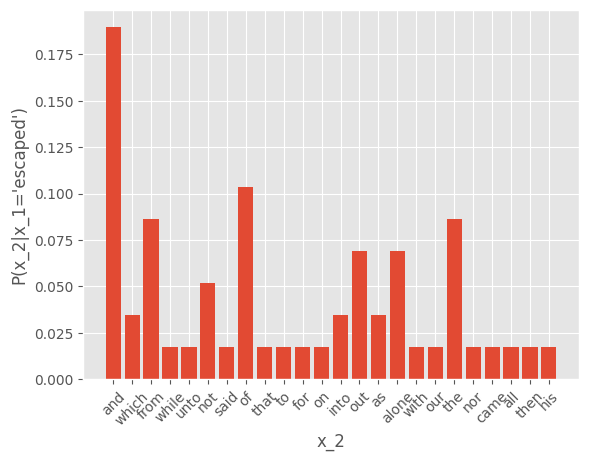

In [ ]:
fig, ax = plt.subplots()
sample = probs["escaped"]
ax.bar(list(sample.keys()), list(sample.values()))

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.set(xlabel="x_2", ylabel="P(x_2|x_1='escaped')")